In [301]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

from ggplot import *
from matplotlib import pyplot as plt

%matplotlib inline

In [60]:
df_09 = pd.read_csv('2009.csv')
df_10 = pd.read_csv('2010.csv')
df_11 = pd.read_csv('2011.csv')
df_12 = pd.read_csv('2012.csv')
df_13 = pd.read_csv('2013.csv')
df_14 = pd.read_csv('2014.csv')
df_15 = pd.read_csv('2015.csv')
df_16 = pd.read_csv('2016.csv')

In [28]:
def make_datetime(group_starts_object):
    return datetime.datetime.strptime(group_starts_object, "%Y-%m-%d %H:%M:%S")

2009-12-31 23:35:00


In [271]:
df = pd.concat([df_09, df_10, df_11, df_12, df_13, df_14, df_15, df_16])

def shorten_column_titles(columns):
    new_titles = []
    
    for column_title in columns:
        column_title = column_title[6:]
        """
        column_title = column_title.replace("Delay", "DEL")
        column_title = column_title.replace("Queue Length", "QUE")
        column_title = column_title.replace("Vehicles In Queue", "VEH")
        column_title = column_title.replace("Service Rate", "SER")
        column_title = column_title.replace("Volume", "VOL")
        column_title = column_title.replace("Availability", "AVA")

        column_title = column_title.replace("Lynden/Aldergrove", "Lang")
        column_title = column_title.replace("Pacific Highway", "PacH")
        column_title = column_title.replace("Peace Arch", "PeAr")
        column_title = column_title.replace("Sumas/Huntingdon", "Suma")
        
        
        column_title = column_title.replace("North", "N*")
        column_title = column_title.replace("South", "S*")
        """
        new_titles.append(column_title)
        
    return new_titles
        
df.columns = shorten_column_titles(df.columns)


In [272]:
df.index = df.Starts.apply(make_datetime)
date_series = df.index
del df['Starts']

In [137]:
delays = []
volumes = []
queue_lengths = []

norths = []
souths = []

cars = []

def make_groups(columns): 
    for c_name in columns:
        if "North" in c_name:
            norths.append(c_name)
        else:
            souths.append(c_name)
            
        if "Cars" in c_name:
            cars.append(c_name)
            
        if "Delay" in c_name:
      [date_series.year]      delays.append(c_name)
        elif "Queue Length" in c_name:
            queue_lengths.append(c_name)
        elif "Volume" in c_name:
            volumes.append(c_name)
            
make_groups(df.columns)

48


DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

## Start Grouping  

In [266]:
volumes_by_day = df.groupby([df.index.year, df.index.month, df.index.day])[volumes].sum()
volumes_by_day.reset_index(inplace=True)
volumes_by_day_of_year = volumes_by_day.groupby(['level_1', 'level_2'])[volumes].mean()

In [246]:
def get_df_from_mutual_columns(df, column_list):
    good_cols = []
    for column in df.columns:
        if column in column_list:
            good_cols.append(column)
    return volumes_by_day_of_year[good_cols]

car_volumes_by_day_of_year = get_df_from_mutual_columns(volumes_by_day_of_year, cars)
North_car_volumes_by_day_of_year = get_df_from_mutual_columns(car_volumes_by_day_of_year, norths)
South_car_volumes_by_day_of_year = get_df_from_mutual_columns(car_volumes_by_day_of_year, souths)

In [315]:
total_volume_df = pd.DataFrame(index=North_car_volumes_by_day_of_year.index)

total_volume_df['North Sum'] = North_car_volumes_by_day_of_year.sum(axis=1)
total_volume_df['South Sum'] = South_car_volumes_by_day_of_year.sum(axis=1)

total_volume_df.index = pd.date_range('2016-01-01', '2016-12-31', freq='D')
total_volume_df.tail()

,North Sum,South Sum
2016-12-27,10524.566667,11863.628571
2016-12-28,11703.400000,11820.314286
2016-12-29,11721.333333,11544.342857
2016-12-30,12282.866667,11997.771429
2016-12-31,10027.766667,9793.714286


## Start Visualizing

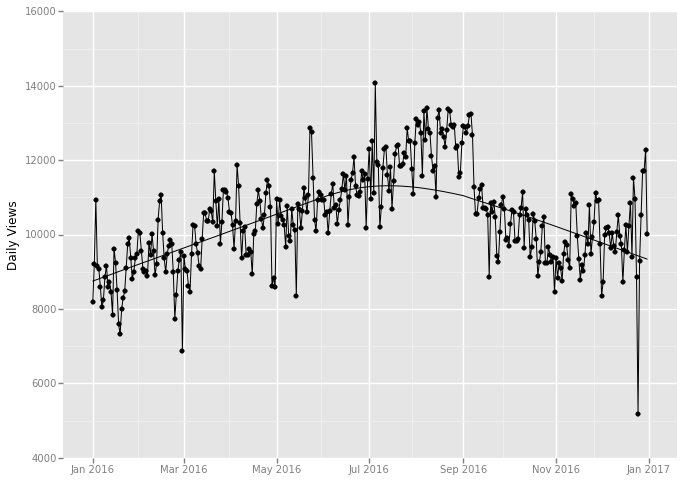

<ggplot: (8744053514833)>

In [348]:
ggplot(total_volume_df, aes(total_volume_df.index, 'North Sum')) + geom_line() + geom_point() + \
  scale_x_date(format = "%b") + xlab("") + ylab("Daily Views")  + stat_smooth(se = False) 

In [345]:
ggplot(total_volume_df, aes(total_volume_df.index, 'South Sum')) + geom_line(color='blue') + \
geom_point(color='blue') + scale_x_date(format = "%b", date_labels = "%B") + xlab("") + \
ylab("Daily Views")  + stat_smooth(se = False, size=2) + geom_vline(xintercept=as.Date("2016-07-04"))


SyntaxError: invalid syntax (<ipython-input-345-7bd0a09a71b1>, line 1)

In [396]:
total_volume_df.tail(10)


def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
print_full(total_volume_df.rank(axis='rows'))

            North Sum  South Sum
2016-01-01          9       19.0
2016-01-02         60      260.0
2016-01-03        246      182.0
2016-01-04         57       56.0
2016-01-05         48       13.0
2016-01-06         20        7.0
2016-01-07          8        2.0
2016-01-08         10        5.0
2016-01-09         35       28.0
2016-01-10         55       37.0
2016-01-11         22       34.0
2016-01-12         27       15.0
2016-01-13         16       10.0
2016-01-14          6        6.0
2016-01-15        103        9.0
2016-01-16         63       59.0
2016-01-17         19       63.0
2016-01-18          4       35.0
2016-01-19          3       46.0
2016-01-20          7       11.0
2016-01-21         11       25.0
2016-01-22         18       18.0
2016-01-23         52       29.0
2016-01-24        117       50.0
2016-01-25        131       89.0
2016-01-26         76       51.0
2016-01-27         30       23.0
2016-01-28         43       24.0
2016-01-29         72       42.0
2016-01-30

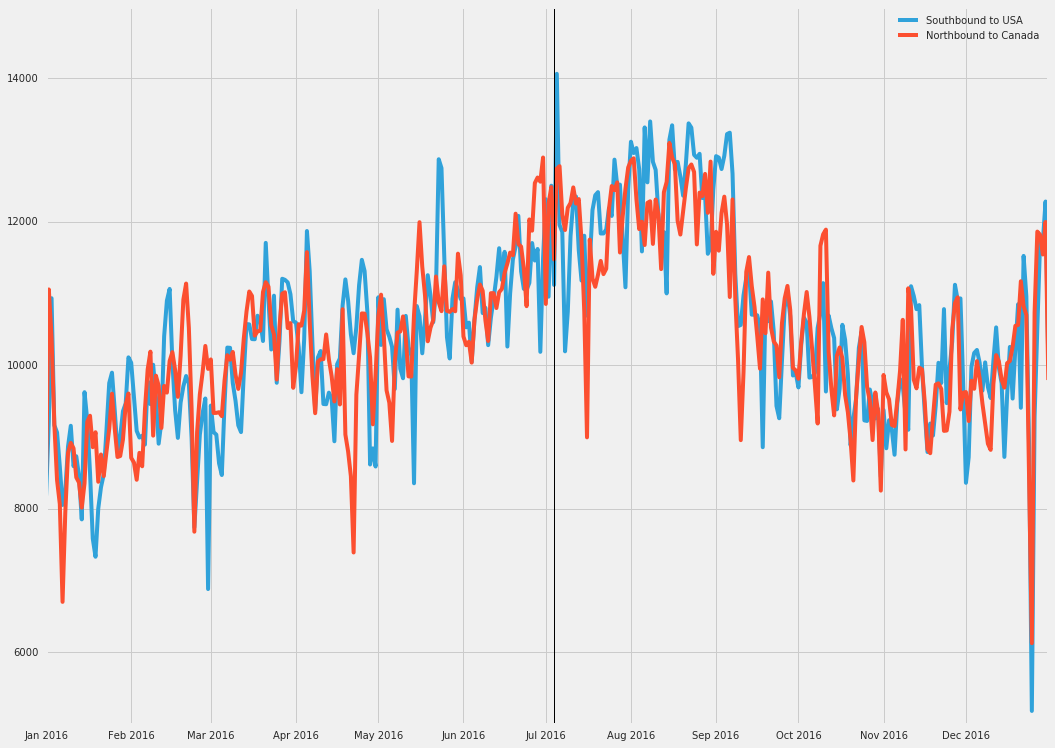

In [381]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16,12))
    plt.plot(total_volume_df)
    plt.axvline(x="2016-07-04", linewidth=1, color='black')
    plt.legend(labels=['Southbound to USA', 'Northbound to Canada'])
    plt.show()